Data Cleaning

In [61]:
# path to cleaned data
file_path_ad = "../Raw_data/application_data_cleaned.csv"
#file_path_pad = "../Raw_data/previous_application.csv"

In [62]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [63]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType

# Create a SparkSession
spark = SparkSession.builder\
    .appName("SparkSQL")\
    .config("spark.driver.memory", "8g")\
    .getOrCreate()

In [64]:
# Read in data from S3 Buckets
from pyspark import SparkFiles

df_ad = spark.read.csv(file_path_ad, header=True, inferSchema=True)
#df_pad =spark.read.csv(file_path_pad, header=True, inferSchema=True)

In [65]:
# Show application data DataFrame
df_ad.show(3)
df_ad.createOrReplaceTempView('app_data')


+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+------------------+------------------+------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+------

In [66]:
spark.sql("cache table app_data")
spark.catalog.isCached("app_data")

True

In [76]:
q1 = """
SELECT Count(TARGET) AS `0`
FROM
app_data
WHERE TARGET = 0
"""
target0 = spark.sql(q1).show()


+------+
|     0|
+------+
|280845|
+------+



In [77]:
q1 = """
SELECT Count(TARGET) AS `1`
FROM
app_data
WHERE TARGET = 1
"""
target1 = spark.sql(q1).show()


+-----+
|    1|
+-----+
|24703|
+-----+



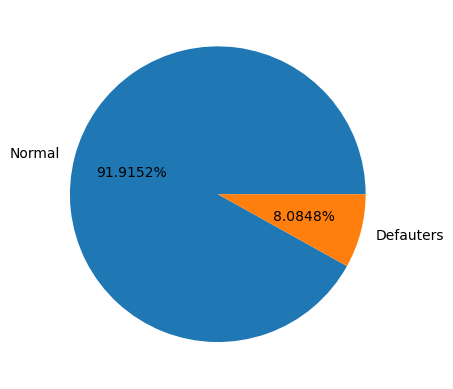

In [83]:
import matplotlib.pyplot as plt
labels = ['Normal', 'Defauters']
sizes = [280845,24703]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.4f%%')
plt.show()

In [69]:
# end spark session

#spark.stop()